# Final Project Group 7

# Authors: Leroy Musa, Chan Woo Hwang, Gordon Hamilton, Joaquin Philco

**Original Dataset Source: House Prices 2023 Dataset. gigasheet. https://www.gigasheet.com/sample-data/house-prices-2023-dataset**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv**

In [237]:
# Import libraries
# you can install missing library using pip install numpy 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
url = "https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv"
housing_prices = pd.read_csv(url, sep=',')

# backup copy of the dataset
housing_backup = housing_prices

In [170]:
housing_prices

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [171]:
housing_prices.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [172]:
housing_prices.describe()

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
count,99499.000000,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,78883.893064,1.037592e+07,3.530106,3.350737,8.757479
std,48239.423663,1.066000e+07,1.474217,1.255913,7.466471
min,0.000000,1.550000e+04,1.000000,0.000000,0.000000
25%,37236.500000,1.500000e+05,2.000000,2.000000,4.800000
50%,76065.000000,7.500000e+06,3.000000,3.000000,6.700000
75%,119401.500000,1.550000e+07,5.000000,4.000000,10.000000
max,168445.000000,4.490000e+07,7.000000,6.000000,194.000000


In [173]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [238]:
housing_prices = housing_prices.drop('Unnamed: 0', axis=1) # dropping unnecessary column 
housing_prices = housing_prices[(housing_prices != 0).all(axis=1)] # removes rows that have zero values in any of the columns
housing_prices = housing_prices.drop_duplicates()

# 2. EDA

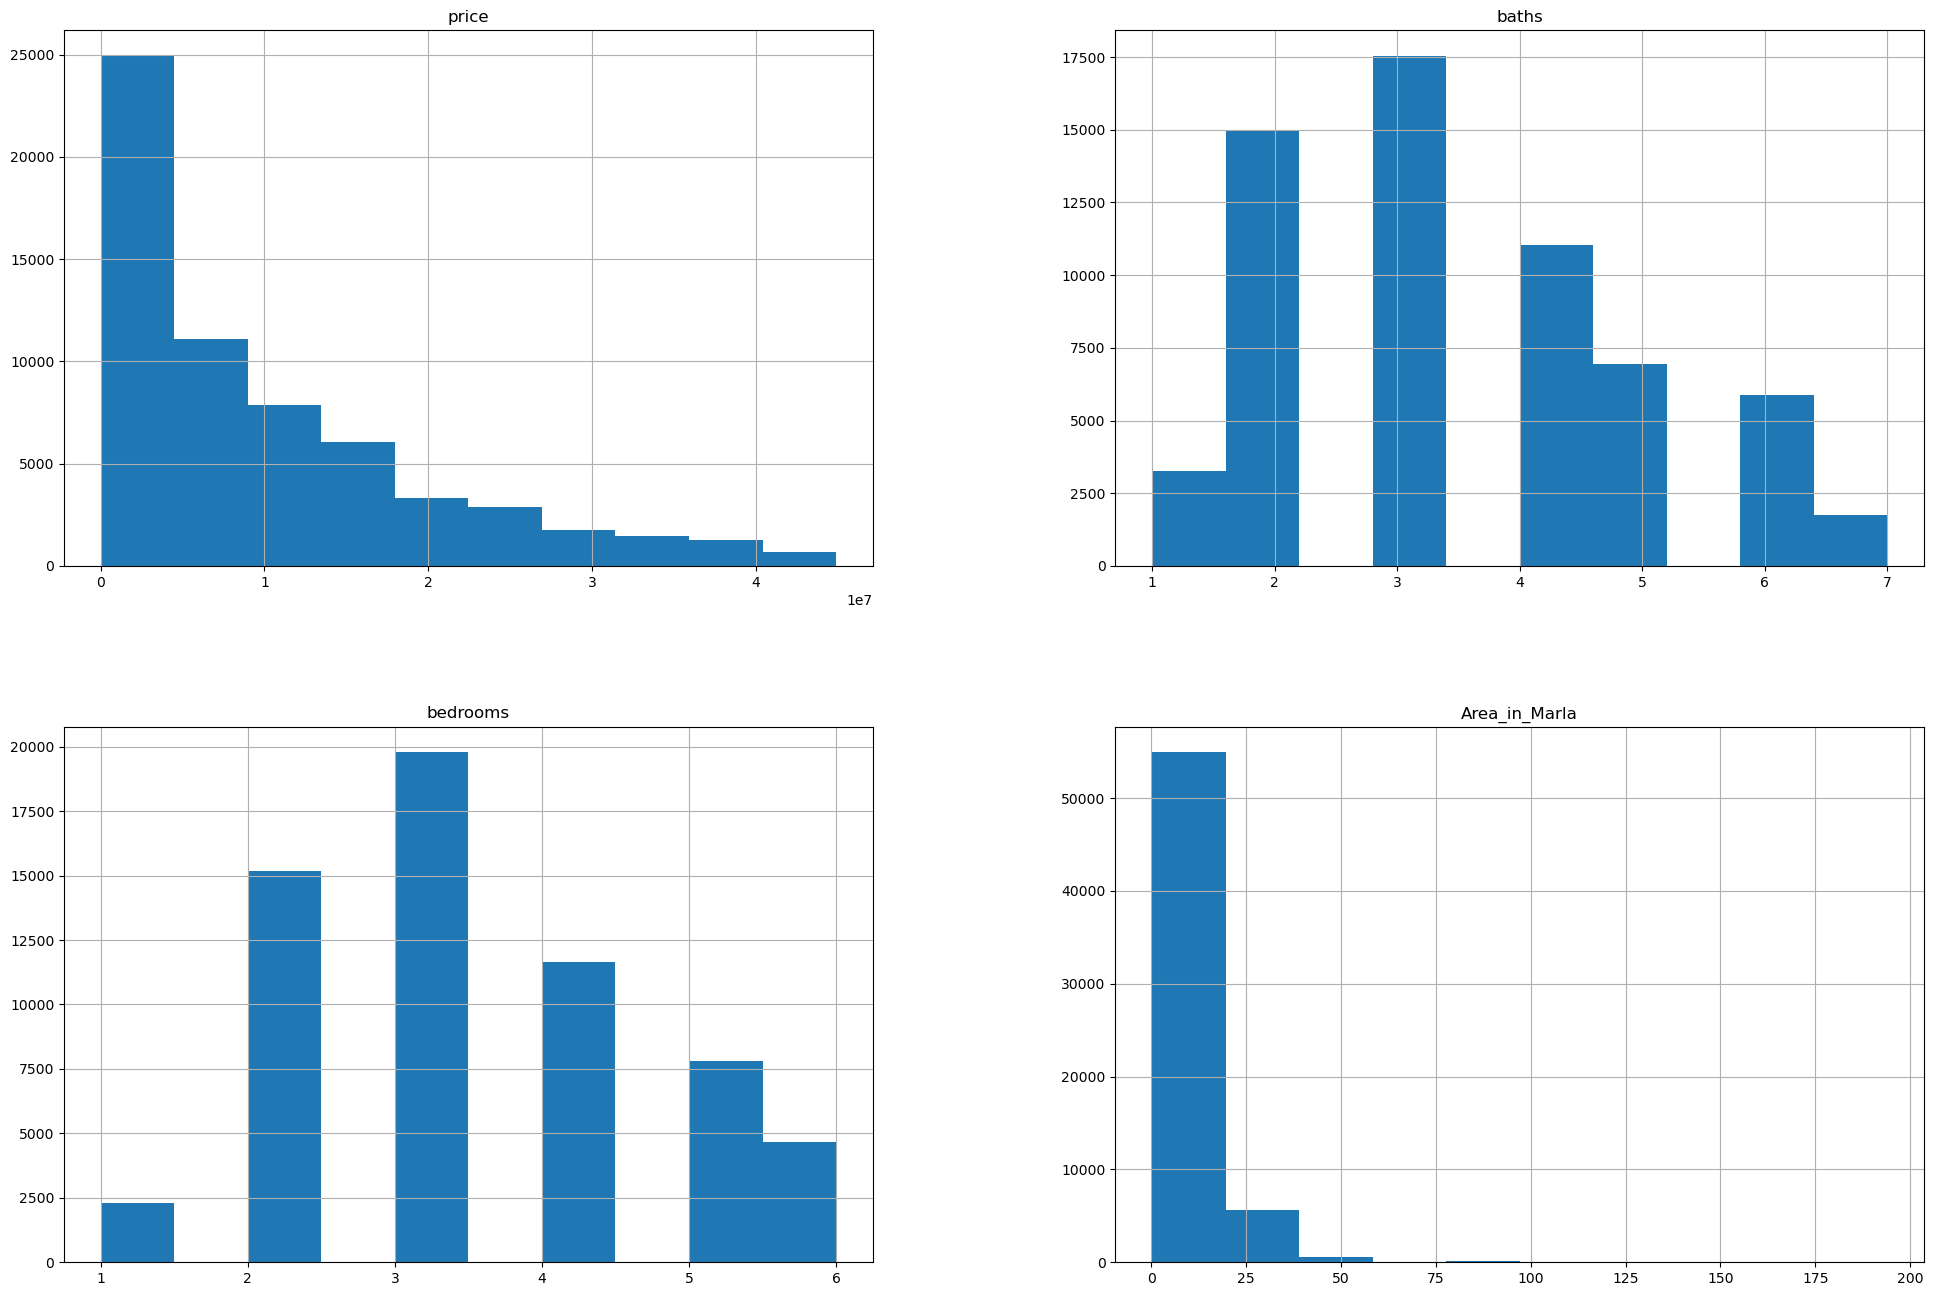

In [175]:
housing_prices.hist(figsize=(24, 16))
plt.show()

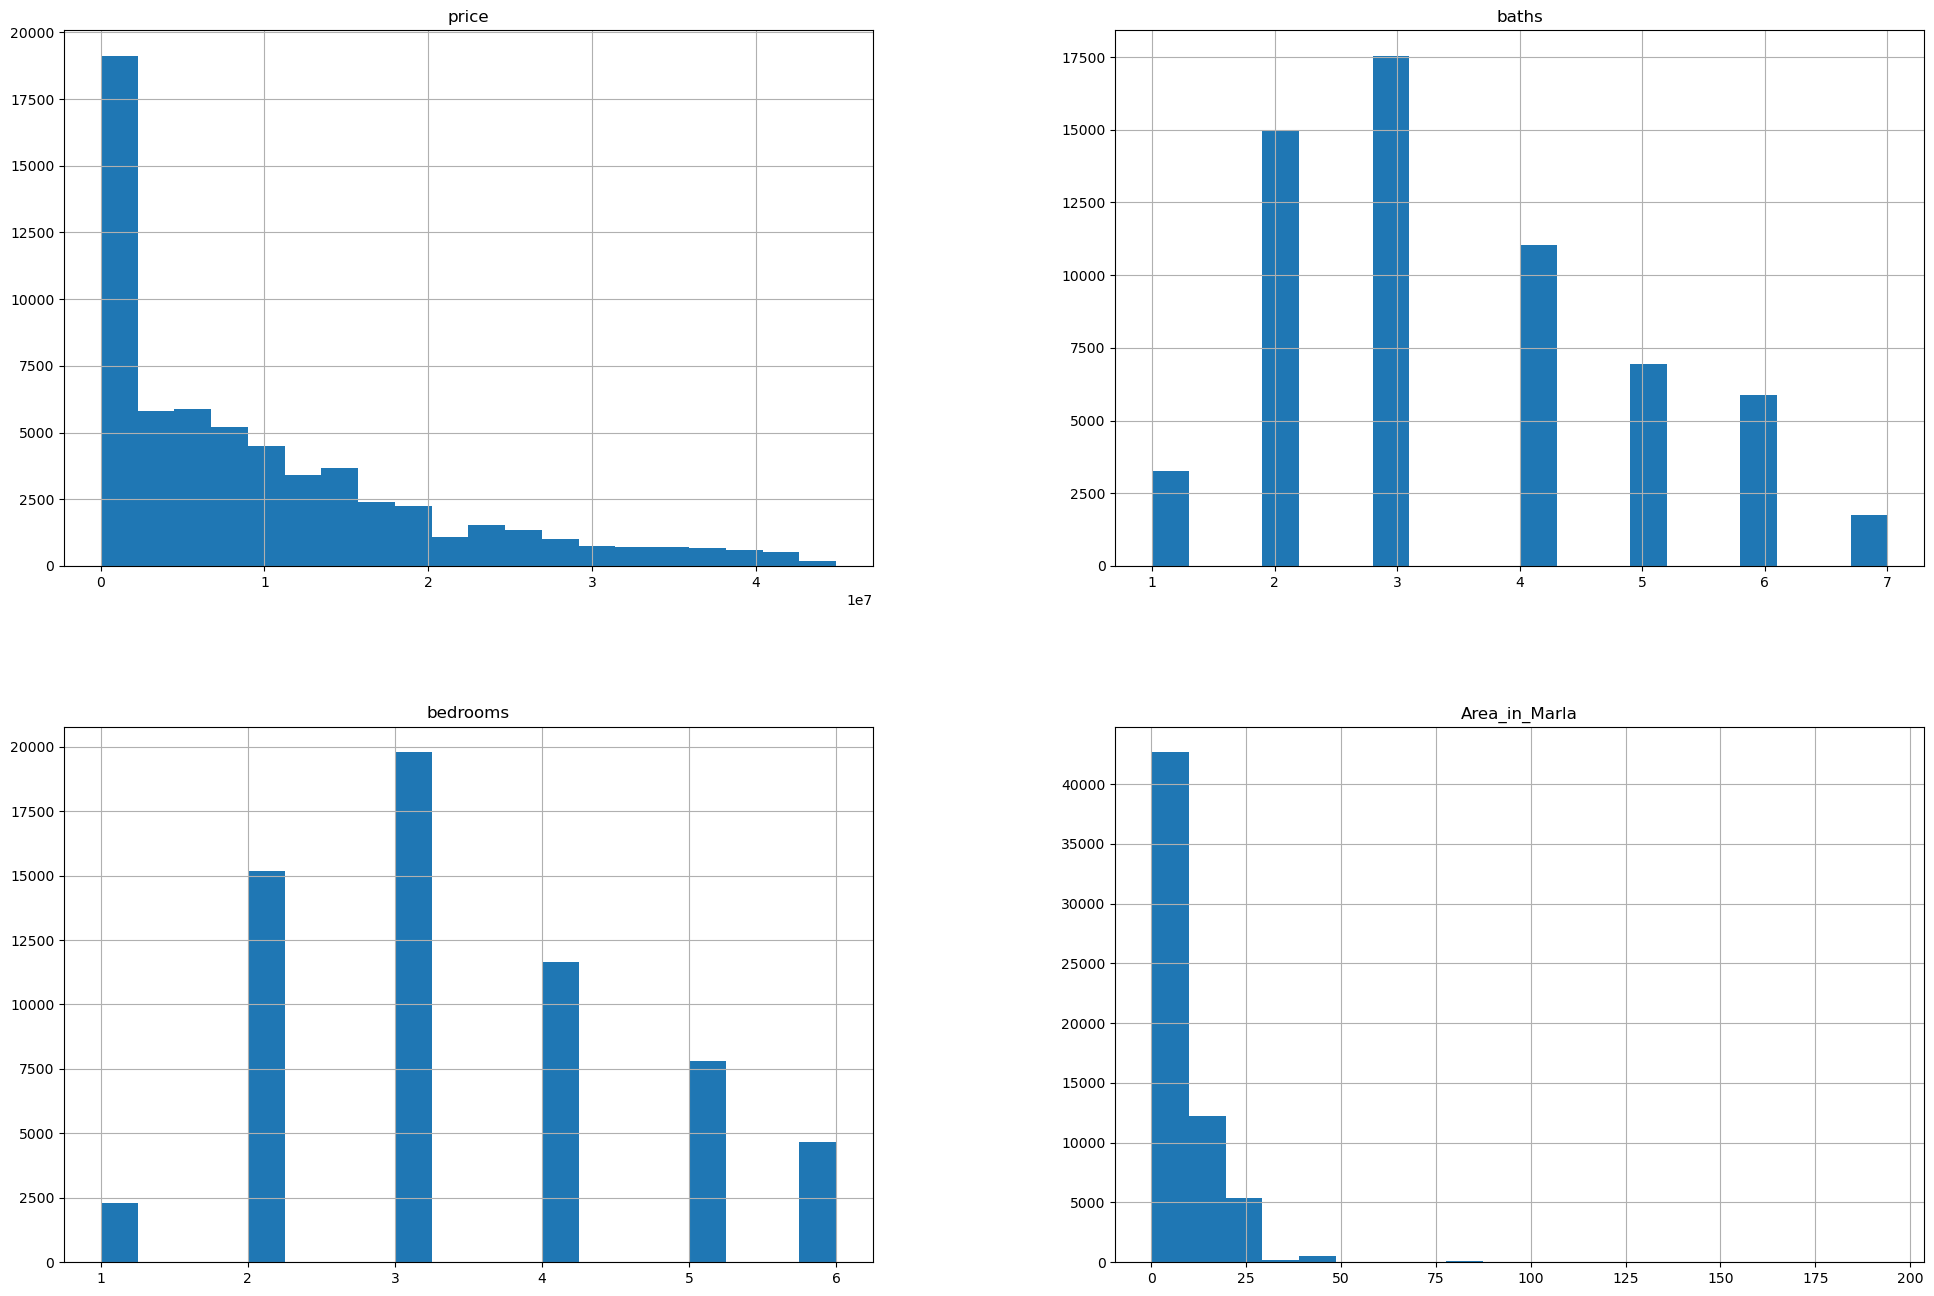

In [176]:
housing_prices.hist(bins=20, figsize=(24, 16))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


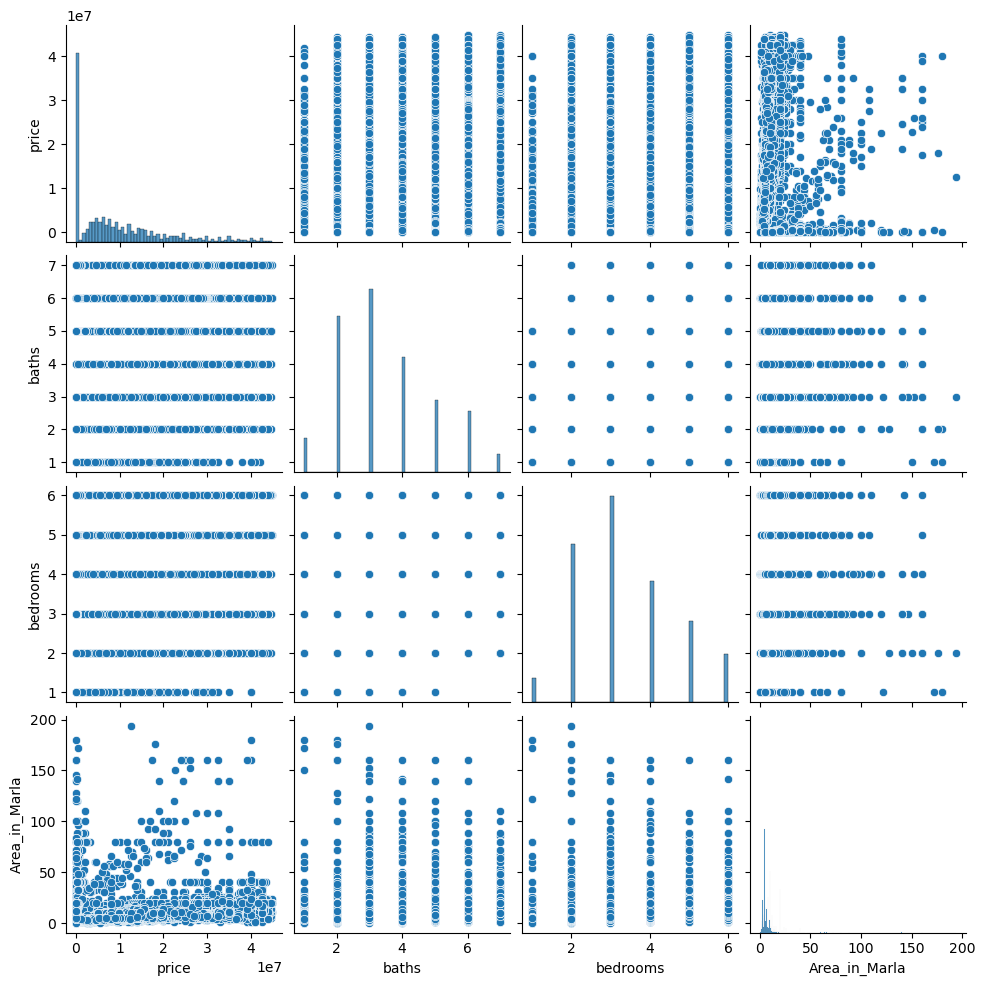

In [177]:
#Check for correlation between attributes using sns.pairplot.
sns.pairplot(housing_prices)

In [178]:
corr_matrix = housing_prices.corr(numeric_only=True)
corr_matrix

,price,baths,bedrooms,Area_in_Marla
price,1.000000,0.452372,0.431209,0.121379
baths,0.452372,1.000000,0.841953,0.336528
bedrooms,0.431209,0.841953,1.000000,0.299682
Area_in_Marla,0.121379,0.336528,0.299682,1.000000


(array([ 2292.,     0.,     0.,     0., 15171.,     0.,     0.,     0.,
        19787.,     0.,     0.,     0., 11637.,     0.,     0.,     0.,
         7814.,     0.,     0.,  4647.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <BarContainer object of 20 artists>)

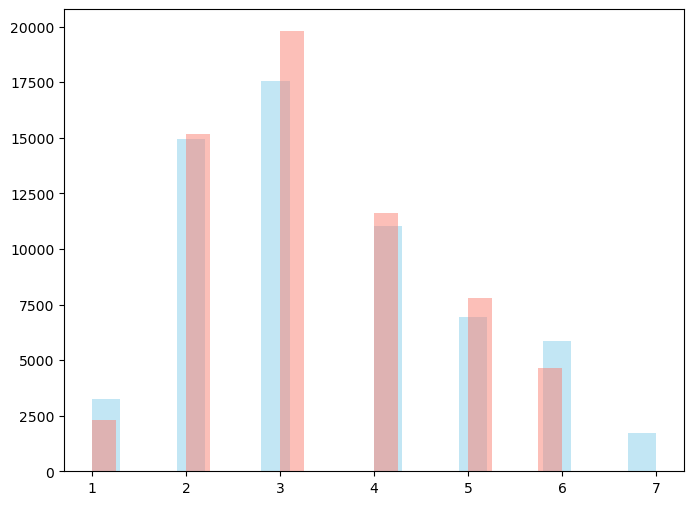

In [179]:
plt.figure(figsize=(8, 6))
plt.hist(housing_prices["baths"], bins=20, color='skyblue', alpha=0.5, label='Baths')  # Set alpha to make the histogram transparent
plt.hist(housing_prices['bedrooms'], bins=20, color='salmon', alpha=0.5, label='Bedrooms')

(array([1.8840e+03, 1.1643e+04, 1.7334e+04, 5.5250e+03, 6.2840e+03,
        7.5510e+03, 2.3740e+03, 1.3200e+03, 7.9900e+02, 2.2600e+02,
        4.1720e+03, 2.5700e+02, 5.0200e+02, 4.4700e+02, 3.9000e+01,
        6.5000e+01, 7.9000e+01, 1.4000e+01, 3.0000e+01, 3.0000e+01,
        4.2500e+02, 1.7000e+01, 1.9000e+01, 5.0000e+00, 5.6000e+01,
        9.0000e+00, 7.0000e+00, 5.0000e+00, 4.0000e+00, 5.0000e+00,
        1.9000e+01, 3.0000e+00, 1.1000e+01, 8.0000e+00, 5.0000e+00,
        0.0000e+00, 3.0000e+00, 1.4000e+01, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 8.4000e+01, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        8.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 8.0000e+00, 1.00

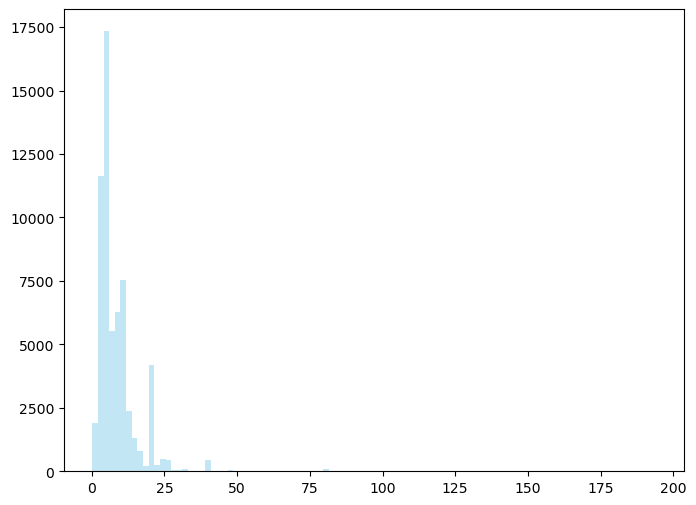

In [180]:
plt.figure(figsize=(8, 6))
plt.hist(housing_prices["Area_in_Marla"], bins=100, color='skyblue', alpha=0.5, label='Data 1')

Text(0.5, 0, 'Bedrooms and Baths')

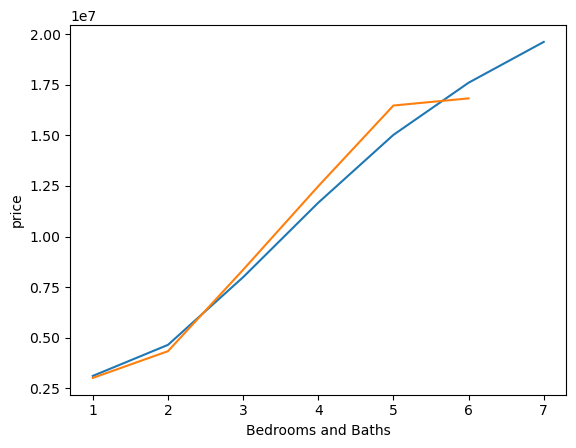

In [181]:
g = sns.lineplot(x="baths", y="price", data=housing_prices, errorbar=None)
g = sns.lineplot(x="bedrooms", y="price", data=housing_prices, errorbar=None)
g.set_xlabel("Bedrooms and Baths")

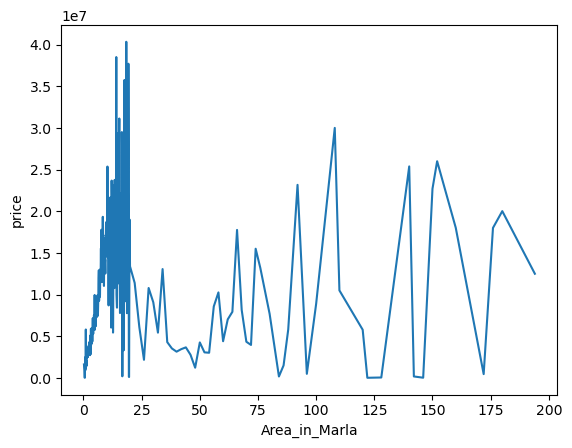

In [182]:
g = sns.lineplot(x="Area_in_Marla", y="price", data=housing_prices, errorbar=None)

# 3. Create a pipeling

In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# housing_prices = housing_prices.drop('location', axis = 1)
num_cols = housing_prices.select_dtypes(include='number').columns.to_list()
cat_cols = housing_prices.select_dtypes(exclude='number').columns.to_list()

num_cols.remove("price")

#create pipelines for numeric and categorical columns

num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler())
# sparse output is required or creates an error
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))


#use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)], remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['baths', 'bedrooms', 'Area_in_Marla']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['property_type', 'location', 'city',
                                  'purpose'])])

In [240]:
housing_prepared = preprocessing.fit_transform(housing_prices)

feature_names=preprocessing.get_feature_names_out()
housing_prepared = pd.DataFrame(housing_prepared, columns=feature_names)

housing_prepared


,num__baths,num__bedrooms,num__Area_in_Marla,cat__property_type_Farm House,cat__property_type_Flat,cat__property_type_House,cat__property_type_Lower Portion,cat__property_type_Penthouse,cat__property_type_Room,cat__property_type_Upper Portion,...,cat__location_Zulfiqar Colony,cat__location_circular road,cat__city_Faisalabad,cat__city_Islamabad,cat__city_Karachi,cat__city_Lahore,cat__city_Rawalpindi,cat__purpose_For Rent,cat__purpose_For Sale,remainder__price
0,-0.982609,-1.049000,-0.564613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10000000.0
1,-0.307720,-0.271768,-0.368324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6900000.0
2,1.716948,1.282697,-0.073890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16500000.0
3,0.367169,0.505464,3.851886,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,43500000.0
4,-0.307720,-0.271768,-0.073890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61343,1.716948,1.282697,1.888998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40000000.0
61344,-0.982609,-1.049000,0.416832,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25000.0
61345,1.716948,1.282697,1.398276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,41500000.0
61346,-0.307720,-0.271768,0.171471,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,22500000.0


In [241]:
from sklearn.model_selection import train_test_split

x = housing_prepared.drop(["remainder__price"], axis=1)
y = housing_prepared["remainder__price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(49078, 1403) (49078,) (12270, 1403) (12270,)


# 4. Select a Model and train it

# 4-1. Linear Regression

In [242]:
# Model 1
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
# training the model on the training data
lr_model.fit(x_train,y_train)

LinearRegression()

In [243]:
lr_model

LinearRegression()

# 4-2. DecisionTree Regression

In [244]:
# Model 2
from sklearn.tree import DecisionTreeRegressor

# Create and fit the DecisionTreeRegressor model with default parameters
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

# 4-3. RandomForest Regression

In [245]:
# Model 3
from sklearn.ensemble import RandomForestRegressor
# Create and fit the RandomForestRegressor model with default parameters
random_forest_model = RandomForestRegressor(random_state=2)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=2)

# Model Analysis

# MSE of Models

In [246]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [247]:
def get_mse (model) : 
    y_pred = model.predict(x_test)
    return mean_squared_error(y_test,y_pred)

In [248]:
# Results of all Models
mse_lr = get_mse(lr_model)
mse_dtr = get_mse(decision_tree_model)
mse_RFR = get_mse(random_forest_model)

print("LR mean standard error:" , mse_lr)
print("DTR mean standard error: ", mse_dtr)
print("RFR mean standard error: ", mse_RFR)

LR mean standard error: 4.2538131512713835e+32
DTR mean standard error:  15479998372327.543
RFR mean standard error:  12799626537481.514


# RMSE of Models

In [249]:
def get_rmse(model) : 
    y_pred = model.predict(x_test)
    return math.sqrt(get_mse(model))

In [250]:
# Results of all Models
rmse_lr = get_rmse(lr_model)
rmse_dtr = get_rmse(decision_tree_model)
rmse_RFR = get_rmse(random_forest_model)

print("LR root mean standard error:" , rmse_lr)
print("DTR root mean standard error: ", rmse_dtr)
print("RFR root mean standard error: ", rmse_RFR)

LR root mean standard error: 2.0624774304877576e+16
DTR root mean standard error:  3934462.9077330926
RFR root mean standard error:  3577656.5706453035


# MAE of Models

In [251]:
def get_mae(model) : 
    y_pred = model.predict(x_test)
    return mean_absolute_error(y_test, y_pred)

In [263]:
# Results of all Models
mae_lr = get_mae(lr_model)
mae_dtr = get_mae(decision_tree_model)
mae_RFR = get_mae(random_forest_model)

print("LR  mean absolute error:" , mae_lr)
print("DTR mean absolute error: ", mae_dtr)
print("RFR mean absolute error: ", mae_RFR)

LR  mean absolute error: 1167386988965200.2
DTR mean absolute error:  2052946.7844565115
RFR mean absolute error:  1897373.8663468838




#  Cross Validation

In [253]:
from sklearn.model_selection import cross_val_score, KFold

In [254]:
def get_scores (model) :
    return cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [255]:

lr_scores = get_scores(lr_model)
dtr_scores = get_scores(decision_tree_model)
RFR_scores = get_scores(random_forest_model)

In [256]:
lr_mean_score = -lr_scores.mean()  # Take the negative value to get the mean squared error
dtr_mean_score = -dtr_scores.mean()
RFR_mean_score = -RFR_scores.mean()
print(f'Cross-Validation Mean Score: {lr_mean_score}')
print(f'Cross-Validation Mean Score: {dtr_mean_score}')
print(f'Cross-Validation Mean Score: {RFR_mean_score}')

Cross-Validation Mean Score: 2.3602597425740116e+35
Cross-Validation Mean Score: 16759903754888.162
Cross-Validation Mean Score: 13149477492716.77


# R2 Score

In [257]:
from sklearn.metrics import r2_score
linear_regression_model_y_pred = lr_model.predict(x_test)
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
random_forest_model_y_pred = random_forest_model.predict(x_test)
lr_r2 = r2_score(y_test, linear_regression_model_y_pred)
dtr_r2 = r2_score(y_test, decision_tree_model_y_pred)
rfr_r2 = r2_score(y_test, random_forest_model_y_pred)
print('R2 of lr',lr_r2)
print('R2 of decision tree',dtr_r2)
print('R2 of random froest ',rfr_r2)

R2 of lr -3.9852161830357504e+18
R2 of decision tree 0.854974495040224
R2 of random froest  0.8800857560028478


# Table

In [258]:
col = ["mse", "MAE", "RMSE", "R2"]
ind = ['LinerRegression', "DecisionTreeRegression", "RandomForestRegression"]
con = [[mse_lr, mae_lr, rmse_lr,lr_r2], [mse_dtr, mae_dtr, rmse_dtr, dtr_r2], [mse_RFR, mae_RFR, rmse_RFR, rfr_r2]]
pd.DataFrame(con, columns=col, index = ind)

,mse,MAE,RMSE,R2
LinerRegression,4.253813e+32,1.167387e+15,2.062477e+16,-3.985216e+18
DecisionTreeRegression,1.548000e+13,2.052947e+06,3.934463e+06,8.549745e-01
RandomForestRegression,1.279963e+13,1.897374e+06,3.577657e+06,8.800858e-01


# Graphs of Models

In [259]:
def plot_scatter(model) : 
    y_pred = model.predict(x_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_test, alpha=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

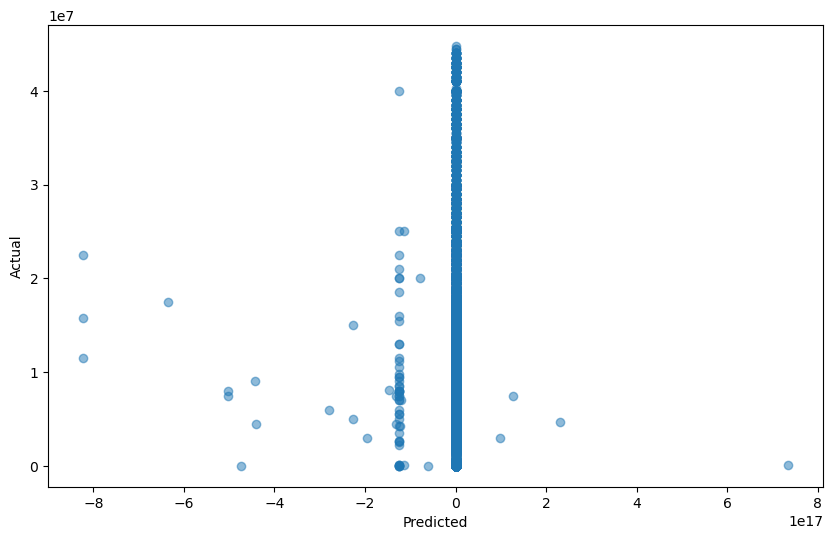

In [260]:
plot_scatter(lr_model)

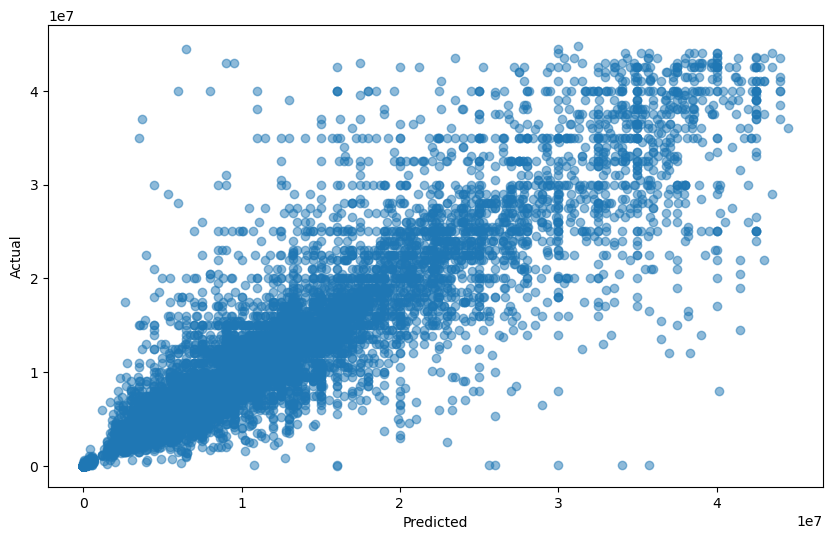

In [261]:
plot_scatter(decision_tree_model)

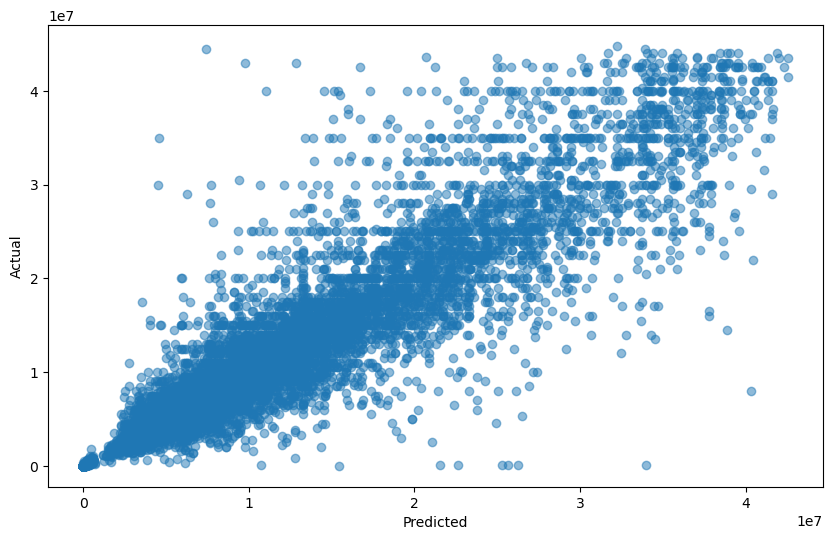

In [262]:
plot_scatter(random_forest_model)

In [ ]:
# Final Project Group 7

# Authors: Leroy Musa, Chan Woo Hwang, Gordon Hamilton, Joaquin Philco

**Original Dataset Source: House Prices 2023 Dataset. gigasheet. https://www.gigasheet.com/sample-data/house-prices-2023-dataset**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv**

# Import libraries
# you can install missing library using pip install numpy 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
url = "https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv"
housing_prices = pd.read_csv(url, sep=',')

# backup copy of the dataset
housing_backup = housing_prices

housing_prices

housing_prices.head()

housing_prices.describe()

housing_prices.info()

housing_prices = housing_prices.drop('Unnamed: 0', axis=1) # dropping unnecessary column 
housing_prices = housing_prices[(housing_prices != 0).all(axis=1)] # removes rows that have zero values in any of the columns
housing_prices = housing_prices.drop_duplicates()

# 2. EDA

housing_prices.hist(figsize=(24, 16))
plt.show()

housing_prices.hist(bins=20, figsize=(24, 16))
plt.show()

#Check for correlation between attributes using sns.pairplot.
sns.pairplot(housing_prices)

corr_matrix = housing_prices.corr(numeric_only=True)
corr_matrix

plt.figure(figsize=(8, 6))
plt.hist(housing_prices["baths"], bins=20, color='skyblue', alpha=0.5, label='Baths')  # Set alpha to make the histogram transparent
plt.hist(housing_prices['bedrooms'], bins=20, color='salmon', alpha=0.5, label='Bedrooms')

plt.figure(figsize=(8, 6))
plt.hist(housing_prices["Area_in_Marla"], bins=100, color='skyblue', alpha=0.5, label='Data 1')

g = sns.lineplot(x="baths", y="price", data=housing_prices, errorbar=None)
g = sns.lineplot(x="bedrooms", y="price", data=housing_prices, errorbar=None)
g.set_xlabel("Bedrooms and Baths")

g = sns.lineplot(x="Area_in_Marla", y="price", data=housing_prices, errorbar=None)

# 3. Create a pipeling

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# housing_prices = housing_prices.drop('location', axis = 1)
num_cols = housing_prices.select_dtypes(include='number').columns.to_list()
cat_cols = housing_prices.select_dtypes(exclude='number').columns.to_list()

num_cols.remove("price")

#create pipelines for numeric and categorical columns

num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler())
# sparse output is required or creates an error
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))


#use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)], remainder='passthrough')

preprocessing

housing_prepared = preprocessing.fit_transform(housing_prices)

feature_names=preprocessing.get_feature_names_out()
housing_prepared = pd.DataFrame(housing_prepared, columns=feature_names)

housing_prepared


from sklearn.model_selection import train_test_split

x = housing_prepared.drop(["remainder__price"], axis=1)
y = housing_prepared["remainder__price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 4. Select a Model and train it

# 4-1. Linear Regression

# Model 1
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
# training the model on the training data
lr_model.fit(x_train,y_train)

lr_model

# 4-2. DecisionTree Regression

# Model 2
from sklearn.tree import DecisionTreeRegressor

# Create and fit the DecisionTreeRegressor model with default parameters
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)

# 4-3. RandomForest Regression

# Model 3
from sklearn.ensemble import RandomForestRegressor
# Create and fit the RandomForestRegressor model with default parameters
random_forest_model = RandomForestRegressor(random_state=2)
random_forest_model.fit(x_train, y_train)

# Model Analysis

# MSE of Models

from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

def get_mse (model) : 
    y_pred = model.predict(x_test)
    return mean_squared_error(y_test,y_pred)

# Results of all Models
mse_lr = get_mse(lr_model)
mse_dtr = get_mse(decision_tree_model)
mse_RFR = get_mse(random_forest_model)

print("LR mean standard error:" , mse_lr)
print("DTR mean standard error: ", mse_dtr)
print("RFR mean standard error: ", mse_RFR)

# RMSE of Models

def get_rmse(model) : 
    y_pred = model.predict(x_test)
    return math.sqrt(get_mse(model))

# Results of all Models
rmse_lr = get_rmse(lr_model)
rmse_dtr = get_rmse(decision_tree_model)
rmse_RFR = get_rmse(random_forest_model)

print("LR root mean standard error:" , rmse_lr)
print("DTR root mean standard error: ", rmse_dtr)
print("RFR root mean standard error: ", rmse_RFR)

# MAE of Models

def get_mae(model) : 
    y_pred = model.predict(x_test)
    return mean_absolute_error(y_test, y_pred)

# Results of all Models
mae_lr = get_mae(lr_model)
mae_dtr = get_mae(decision_tree_model)
mae_RFR = get_mae(random_forest_model)

print("LR  mean absolute error:" , mae_lr)
print("DTR mean absolute error: ", mae_dtr)
print("RFR mean absolute error: ", mae_RFR)



#  Cross Validation

from sklearn.model_selection import cross_val_score, KFold

def get_scores (model) :
    return cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')


lr_scores = get_scores(lr_model)
dtr_scores = get_scores(decision_tree_model)
RFR_scores = get_scores(random_forest_model)

lr_mean_score = -lr_scores.mean()  # Take the negative value to get the mean squared error
dtr_mean_score = -dtr_scores.mean()
RFR_mean_score = -RFR_scores.mean()
print(f'Cross-Validation Mean Score: {lr_mean_score}')
print(f'Cross-Validation Mean Score: {dtr_mean_score}')
print(f'Cross-Validation Mean Score: {RFR_mean_score}')

# R2 Score

from sklearn.metrics import r2_score
linear_regression_model_y_pred = lr_model.predict(x_test)
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
random_forest_model_y_pred = random_forest_model.predict(x_test)
lr_r2 = r2_score(y_test, linear_regression_model_y_pred)
dtr_r2 = r2_score(y_test, decision_tree_model_y_pred)
rfr_r2 = r2_score(y_test, random_forest_model_y_pred)
print('R2 of lr',lr_r2)
print('R2 of decision tree',dtr_r2)
print('R2 of random froest ',rfr_r2)

# Table

col = ["mse", "MAE", "RMSE", "R2"]
ind = ['LinerRegression', "DecisionTreeRegression", "RandomForestRegression"]
con = [[mse_lr, mae_lr, rmse_lr,lr_r2], [mse_dtr, mae_dtr, rmse_dtr, dtr_r2], [mse_RFR, mae_RFR, rmse_RFR, rfr_r2]]
pd.DataFrame(con, columns=col, index = ind)

# Graphs of Models

def plot_scatter(model) : 
    y_pred = model.predict(x_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_test, alpha=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_scatter(lr_model)

plot_scatter(decision_tree_model)

plot_scatter(random_forest_model)

